# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, "max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mata-utu
Processing Record 2 of Set 1 | bodaybo
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | mhamid
Processing Record 7 of Set 1 | ubari
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | lhasa
Processing Record 10 of Set 1 | tralee
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | remire-montjoly
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | mugia
Processing Record 17 of Set 1 | nao me toque
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | midvagur
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | port douglas
Processin

Processing Record 43 of Set 4 | nandaime
Processing Record 44 of Set 4 | nagqu
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | connell
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | manokwari
Processing Record 49 of Set 4 | talusan
Processing Record 0 of Set 5 | badger
Processing Record 1 of Set 5 | agnibilekrou
Processing Record 2 of Set 5 | vorgashor
Processing Record 3 of Set 5 | patos
Processing Record 4 of Set 5 | bandon
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | tadine
Processing Record 7 of Set 5 | qaisumah
Processing Record 8 of Set 5 | ribeira grande
Processing Record 9 of Set 5 | happy valley-goose bay
Processing Record 10 of Set 5 | watford city
Processing Record 11 of Set 5 | kapuskasing
Processing Record 12 of Set 5 | valdivia
Processing Record 13 of Set 5 | san andres
Processing Record 14 of Set 5 | gobabis
Processing Record 15 of Set 5 | jwaneng
Processing Record 16 of Set 5 | manta
Processin

Processing Record 35 of Set 8 | mana
Processing Record 36 of Set 8 | celestun
Processing Record 37 of Set 8 | zaki biam
Processing Record 38 of Set 8 | dawson creek
Processing Record 39 of Set 8 | ambovombe
Processing Record 40 of Set 8 | kultali
City not found. Skipping...
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | gueret
Processing Record 43 of Set 8 | mahina
Processing Record 44 of Set 8 | falmouth
Processing Record 45 of Set 8 | hanzhong
Processing Record 46 of Set 8 | viveiro
Processing Record 47 of Set 8 | colonia
Processing Record 48 of Set 8 | rakops
Processing Record 49 of Set 8 | portland
Processing Record 0 of Set 9 | nago
Processing Record 1 of Set 9 | pursat
Processing Record 2 of Set 9 | enewetak
Processing Record 3 of Set 9 | heinola
Processing Record 4 of Set 9 | darlington
Processing Record 5 of Set 9 | badnawar
Processing Record 6 of Set 9 | puerto madero
Processing Record 7 of Set 9 | salinopolis
Processing Record 8 of Set 9 | shohimardon
P

Processing Record 23 of Set 12 | maloye ganyushkino
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mata-utu,-13.2816,-176.1745,28.35,76,100,6.64,WF,1702256497
1,bodaybo,57.8506,114.1933,-30.12,98,100,0.21,RU,1702256498
2,bredasdorp,-34.5322,20.0403,15.14,82,0,1.24,ZA,1702256498
3,adamstown,-25.0660,-130.1015,21.29,57,0,3.19,PN,1702256499
4,nar'yan-mar,67.6713,53.0870,-22.72,91,100,4.92,RU,1702255914


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

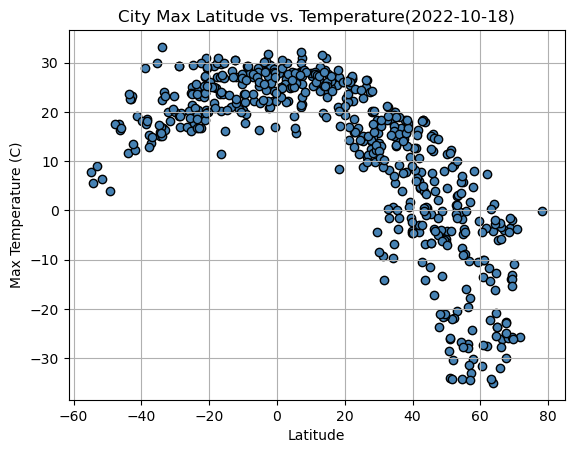

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, c="steelblue", marker="o", edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

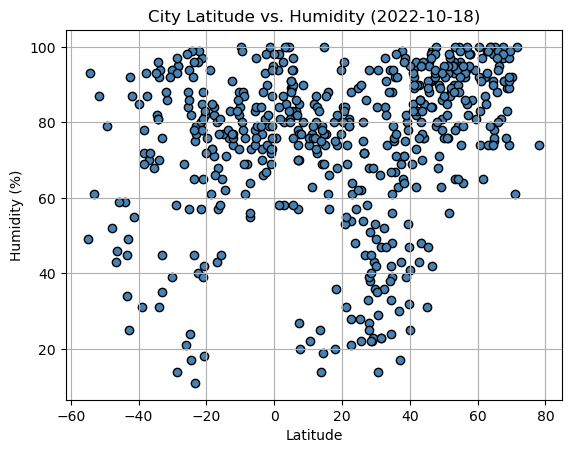

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, c="steelblue", marker="o", edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

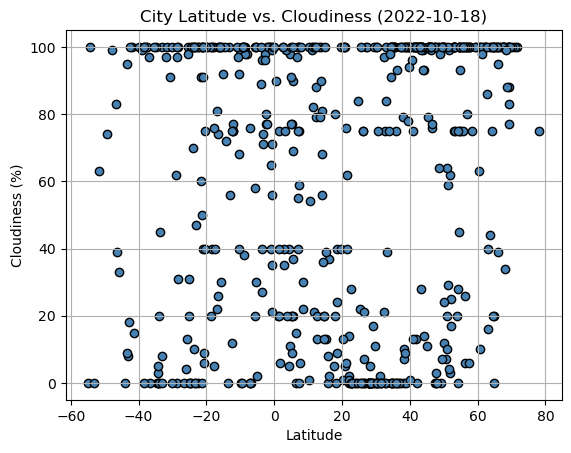

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, c="steelblue", marker="o", edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

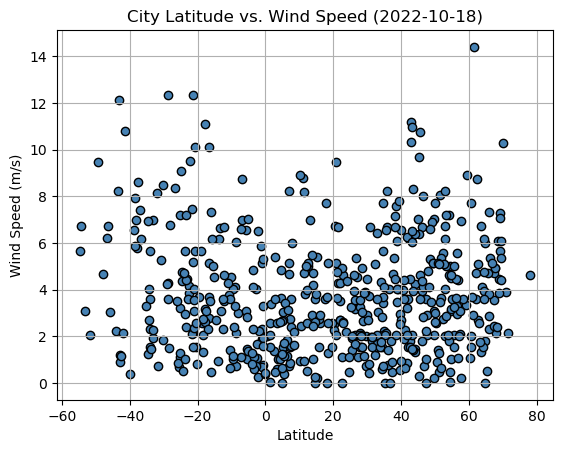

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, c="steelblue", marker="o", edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def regression_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(100, 100),xycoords='figure pixels',fontsize=15,color="red")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bodaybo,57.8506,114.1933,-30.12,98,100,0.21,RU,1702256498
4,nar'yan-mar,67.6713,53.0870,-22.72,91,100,4.92,RU,1702255914
5,mhamid,29.8200,-5.7200,15.79,36,11,2.02,MA,1702255919
6,ubari,26.5921,12.7805,10.93,72,0,3.18,LY,1702256471
7,keflavik,64.0049,-22.5624,1.24,100,100,4.12,IS,1702256500


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mata-utu,-13.2816,-176.1745,28.35,76,100,6.64,WF,1702256497
2,bredasdorp,-34.5322,20.0403,15.14,82,0,1.24,ZA,1702256498
3,adamstown,-25.0660,-130.1015,21.29,57,0,3.19,PN,1702256499
11,port-aux-francais,-49.3500,70.2167,4.01,79,74,9.47,TF,1702256493
13,codrington,-38.2667,141.9667,18.55,72,100,6.97,AU,1702256502


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6816507056702845


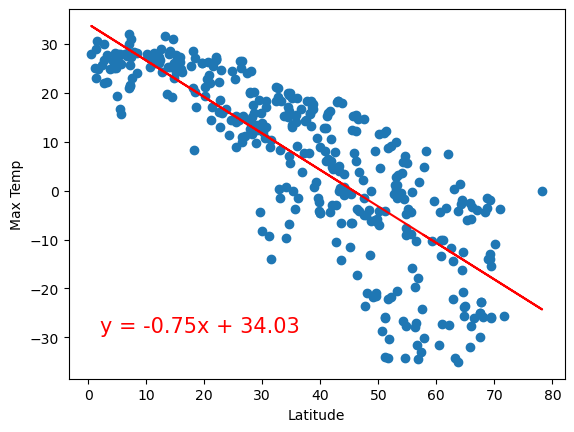

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_label =  "Max Temp"

regression_plot()


The r-value is: 0.358775586068112


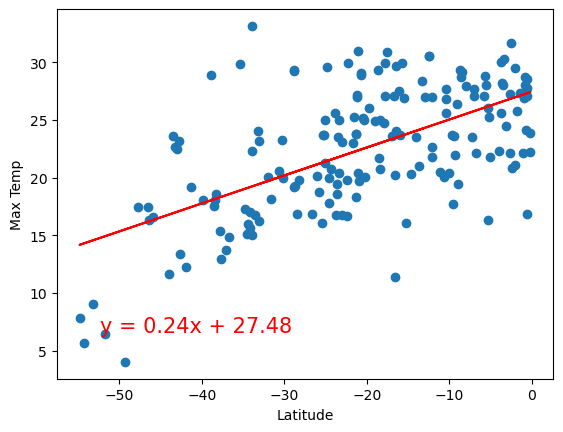

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_label =  "Max Temp"

regression_plot()

**Discussion about the linear relationship:** There is a moderate correlation between latitude and maximum temperature in the Northen Hemisphere where the value of r is 0.68, and a weak correlation in the Southern Hemisphere where the value of r is 0.35. The max tempereature gets higher as latitude gets closer to the equater at Lat 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09018247558220013


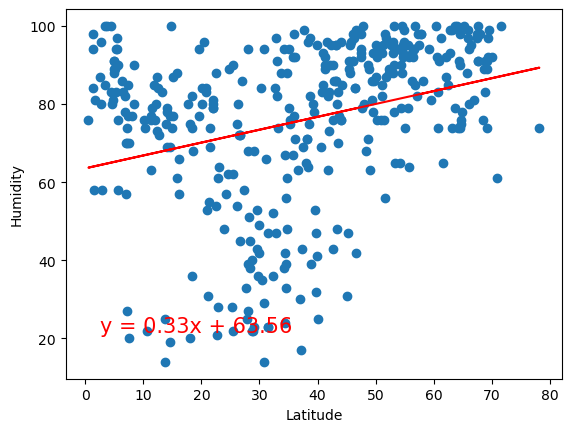

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label =  "Humidity"

regression_plot()

The r-value is: 0.06083034086835141


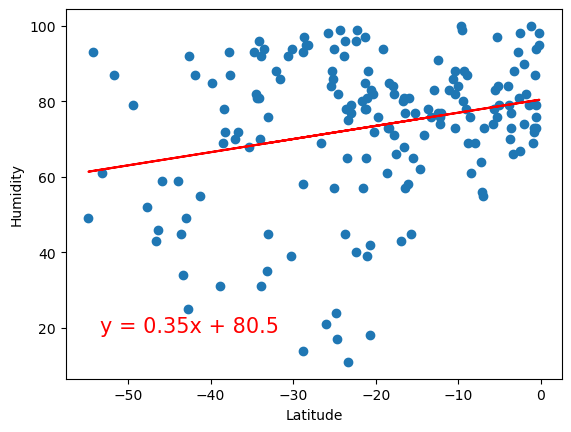

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label =  "Humidity"

regression_plot()

**Discussion about the linear relationship:** The correlation between Latitude and humidity is very weak for both the Northern and Southern Hemispheres at 0.09 and 0.06.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09930504873310618


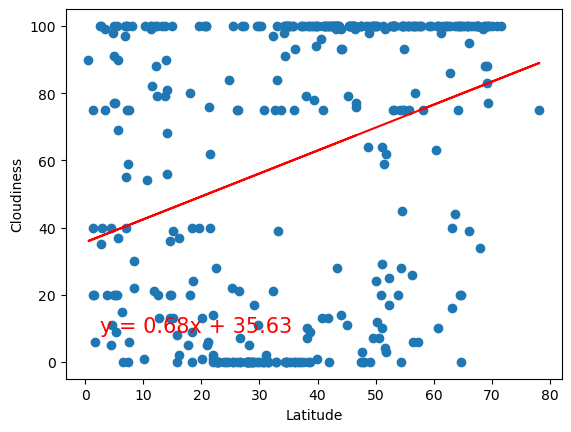

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label =  "Cloudiness"

regression_plot()

The r-value is: 0.03388618585207627


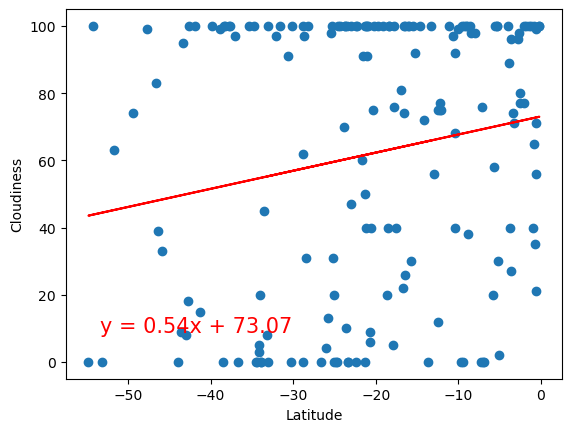

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label =  "Cloudiness"

regression_plot()

**Discussion about the linear relationship:** The correlation between latitude and cloudiness is very weak for both the Northern and Southern Hemispheres at 0.09 and 0.03.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0499773258610751


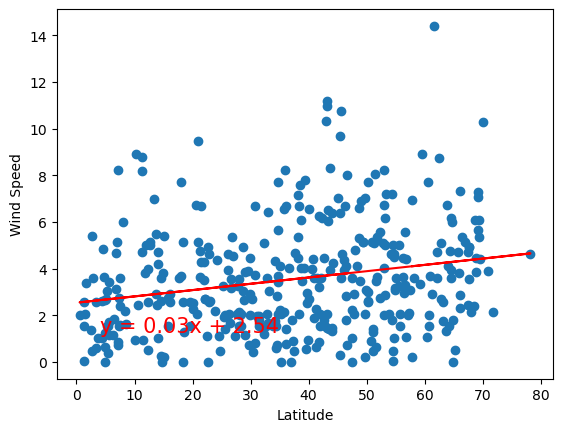

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_label =  "Wind Speed"

regression_plot()

The r-value is: 0.07356079225085531


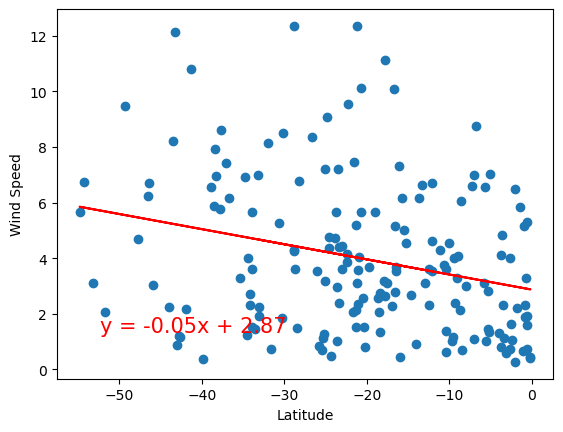

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_label =  "Wind Speed"

regression_plot()

**Discussion about the linear relationship:** The correlation between latitude and cloudiness is very weak for both the Northern and Southern Hemispheres at 0.05 and 0.07.